In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Input, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
import os
import numpy as np
import matplotlib.pyplot as plt

# Dataset Directory

dataset/  
├── train  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;├──cat  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;└──dog  
├── val  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;├──cat  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;└──dog  
└── test  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;├──cat  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;└──dog  

In [0]:
PATH = '/content/gdrive/My Drive/copy_dogs-vs-cats/'

train_path = os.path.join(PATH,"train")
val_path = os.path.join(PATH,"val")
test_path = os.path.join(PATH,"test")

train_cat_path = os.path.join(train_path,"cat")
train_dog_path = os.path.join(train_path,"dog")
val_cat_path = os.path.join(val_path,"cat")
val_dog_path = os.path.join(val_path,"dog")
test_cat_path = os.path.join(test_path,"cat")
test_dog_path = os.path.join(test_path,"dog")

print(train_cat_path,train_dog_path,val_cat_path,val_dog_path,test_cat_path,test_dog_path,sep='\n')

/content/gdrive/My Drive/copy_dogs-vs-cats/train/cat
/content/gdrive/My Drive/copy_dogs-vs-cats/train/dog
/content/gdrive/My Drive/copy_dogs-vs-cats/val/cat
/content/gdrive/My Drive/copy_dogs-vs-cats/val/dog
/content/gdrive/My Drive/copy_dogs-vs-cats/test/cat
/content/gdrive/My Drive/copy_dogs-vs-cats/test/dog


In [0]:
batch_size = 16
IMG_HEIGHT = 224
IMG_WIDTH = 224

train_image_generator = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, rotation_range=40) 
validation_image_generator = ImageDataGenerator(rescale=1./255)

test_image_generator = ImageDataGenerator(rescale=1./255)

In [0]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_path,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=val_path,
                                                              shuffle=True,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

test_data_gen = test_image_generator.flow_from_directory(batch_size=10,
                                                              directory=test_path,
                                                              shuffle=False,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 8500 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [0]:
num_cats_tr = len(os.listdir(train_cat_path))
num_dogs_tr = len(os.listdir(train_dog_path))
num_cats_val = len(os.listdir(val_cat_path))
num_dogs_val = len(os.listdir(val_dog_path))
num_cats_test = len(os.listdir(test_cat_path))
num_dogs_test = len(os.listdir(test_dog_path))

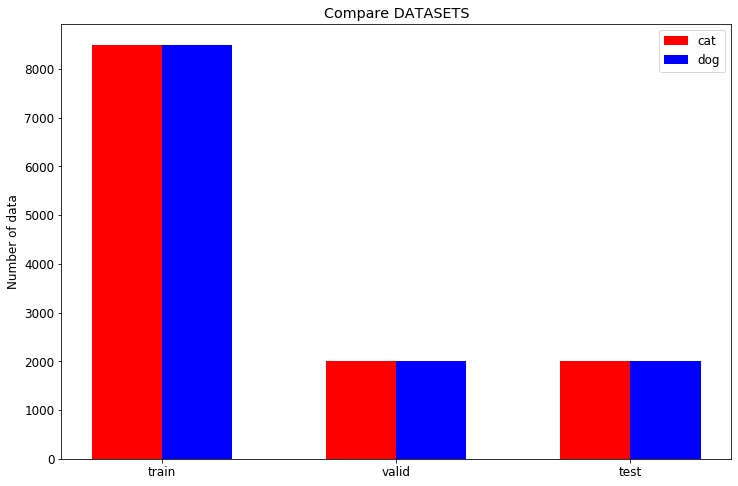

In [0]:
label = ['train', 'valid','test']
cat = [num_cats_tr,num_cats_val,num_cats_test]
dog = [num_dogs_tr,num_dogs_val,num_dogs_test]

plt.rcParams["font.size"] = 12

plt.figure(figsize=(12,8))

x = np.arange(len(label))

plt.bar(x-0.15, cat, label='cat', width=0.3, color='#FF0000')
plt.bar(x+0.15, dog, label='dog', width=0.3, color='#0000FF')
plt.legend()
plt.xticks(x, label)
plt.ylabel('Number of data')
plt.title('Compare DATASETS')


plt.show()

In [0]:
def create_vgg16():
  input_tensor = Input(shape=(224, 224, 3), dtype='float32', name='input')
  # Block 1
  x = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', name='block1_conv1')(input_tensor)
  x = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', name='block1_conv2')(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

  # Block 2
  x = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', name='block2_conv1')(x)
  x = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', name='block2_conv2')(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

  # Block 3
  x = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', name='block3_conv1')(x)
  x = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', name='block3_conv2')(x)
  x = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', name='block3_conv3')(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

  # Block 4
  x = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', name='block4_conv1')(x)
  x = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', name='block4_conv2')(x)
  x = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', name='block4_conv3')(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

  # Block 5
  x = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', name='block5_conv1')(x)
  x = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', name='block5_conv2')(x)
  x = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', name='block5_conv3')(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

  # Dense
  x = Flatten()(x)
  x = Dense(1024, activation='relu', kernel_initializer='he_normal')(x)
  x = Dropout(0.2)(x)
  x = BatchNormalization()(x)
  x = Dense(512, activation='relu', kernel_initializer='he_normal')(x)
  x = BatchNormalization()(x)
  output_tensor = Dense(1, activation='sigmoid')(x)
  model_vgg16 = tf.keras.Model(inputs = input_tensor, outputs = output_tensor)
  return model_vgg16

In [0]:
model_vgg16 = create_vgg16()
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_vgg16.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpoint_path = "/content/gdrive/My Drive/dogs_cats_save_vgg16/vgg_checkpoint/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, verbose=1, save_weights_only=True,
    period=50)

In [0]:
model_vgg16.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 64)      256       
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584

In [0]:
history_vgg16 = model_vgg16.fit_generator(train_data_gen, steps_per_epoch=80, epochs=250, callbacks=[cp_callback],validation_data=val_data_gen, validation_steps = 20, verbose=1)

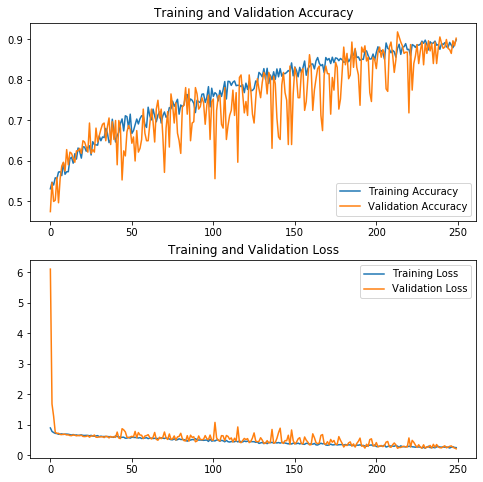

In [0]:
acc = history_vgg16.history['accuracy']
val_acc = history_vgg16.history['val_accuracy']

loss = history_vgg16.history['loss']
val_loss = history_vgg16.history['val_loss']

epochs_range = range(250)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [0]:
model_vgg16.evaluate_generator(test_data_gen, steps=400,verbose=1)
pred = model_vgg16.predict_generator(test_data_gen, steps=400, verbose=1)

400/400 [==============================] - 50s 124ms/step


# confusion_matrix

In [0]:
pred_int = []
for i in range(len(pred)):
  if pred[i] > 0.5:
    pred_int.append(1)
  elif pred[i] <= 0.5:
    pred_int.append(0)

print(len(pred))
print(len(pred_int))

4000
4000


Confusion Matrix
[[1914   86]
 [  88 1912]]


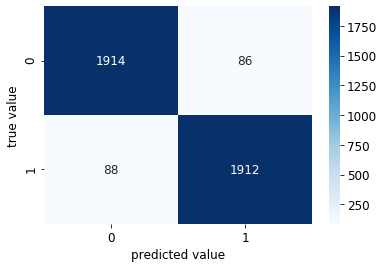

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
print('Confusion Matrix')
conf_matrix = confusion_matrix(test_data_gen.classes, pred_int)
print(conf_matrix)
sns.heatmap(conf_matrix,cmap="Blues",annot=True,fmt='g')
plt.xlabel('predicted value')
plt.ylabel('true value')

# Visualizing feature map

In [0]:
from tensorflow.keras.preprocessing.image import load_img

TEST_PATH = '/content/gdrive/My Drive/dogs-vs-cats/test'

# model test
photo_dog = load_img(test_dog_path + '/' + 'dog.66.jpg', target_size=(IMG_HEIGHT, IMG_WIDTH))
photo_cat = load_img(test_cat_path + '/' + 'cat.1.jpg', target_size=(IMG_HEIGHT, IMG_WIDTH))

In [0]:
test_image_dog = np.array(photo_dog).reshape((-1,IMG_HEIGHT,IMG_WIDTH,3))/255.0
test_image_cat = np.array(photo_cat).reshape((-1,IMG_HEIGHT,IMG_WIDTH,3))/255.0

In [0]:
pred_dog = model_vgg16.predict(test_image_dog)
pred_cat = model_vgg16.predict(test_image_cat)

print('dog :',pred_dog)
print('cat :',pred_cat)

dog : [[0.99998903]]
cat : [[0.00027696]]


In [0]:
def Layers_predict(model, image):
  output_layers = [layer.output for layer in model.layers[1:24] if not layer.name.startswith('batch_normalization')]
  output_names = [layer.name for layer in model.layers[1:24] if not layer.name.startswith('batch_normalization')]
  model_A = tf.keras.models.Model(inputs = model.input, outputs = output_layers)
  model_A_pred = model_A.predict(image)
  return model_A_pred, output_names

In [0]:
def show_predict_image(show_model_pred,output_names):
  n_col= 16
  _, _, size, n_features = show_model_pred.shape
  n_row = n_features //n_col
  feature_map_image = np.zeros(shape=(size,size*n_col),dtype=('uint8'))
  for row in range(1):
      for col in range(n_col):   
          input_fmi = show_model_pred[0,:,:,row*n_col+col]

          input_fmi -= input_fmi.mean()
          input_fmi /= input_fmi.std()
          input_fmi *= 64
          input_fmi += 128
          input_fmi = np.clip(input_fmi, 0, 255).astype('uint8')

          feature_map_image[row*size:(row+1)*size, col*size:(col+1)*size] = input_fmi

  plt.figure(figsize=(n_col, n_row))
  plt.xticks([])
  plt.yticks([])
  plt.title('layer : {}'.format(output_names))
  plt.tight_layout()
  plt.imshow(feature_map_image,cmap='viridis')  

In [0]:
model_predict_vgg16_dog, pred_names_vgg16_dog = Layers_predict(model_vgg16,test_image_dog)

In [0]:
model_predict_vgg16_cat, pred_names_vgg16_cat = Layers_predict(model_vgg16,test_image_cat)

In [0]:
print(len(model_predict_vgg16_dog))
print(pred_names_vgg16_dog)

18
['block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


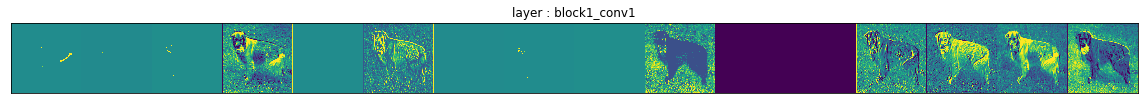

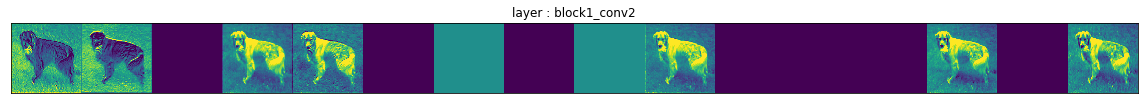

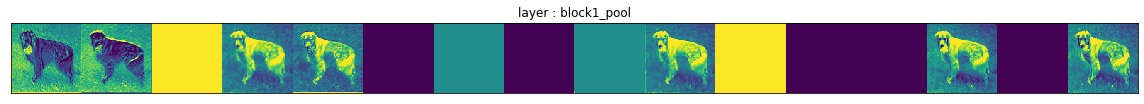

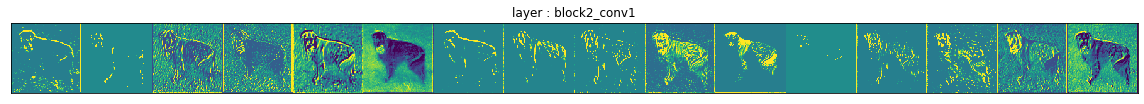

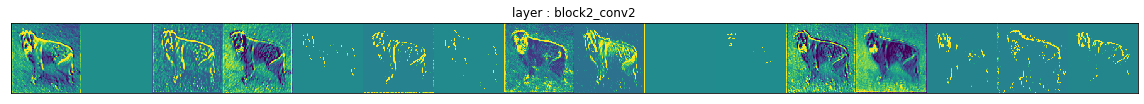

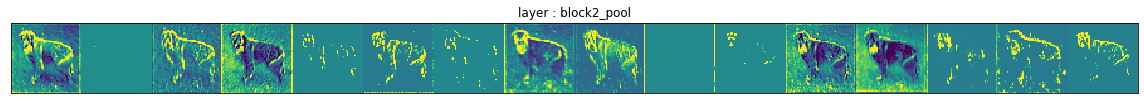

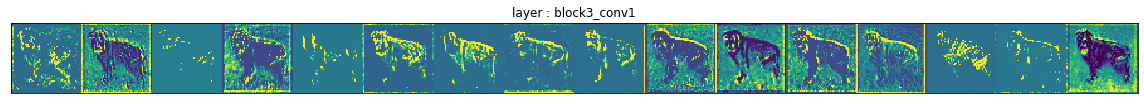

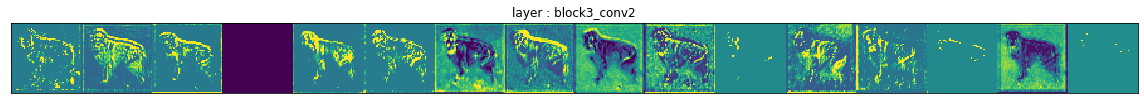

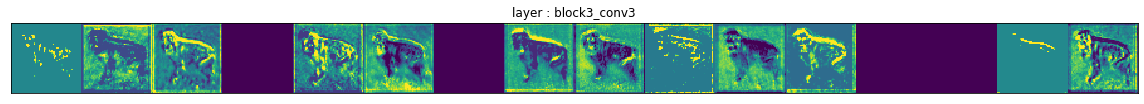

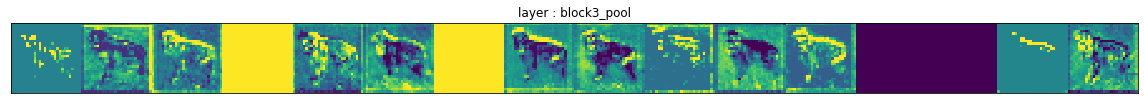

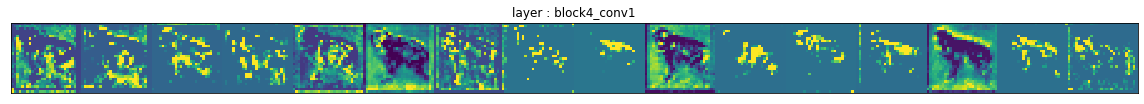

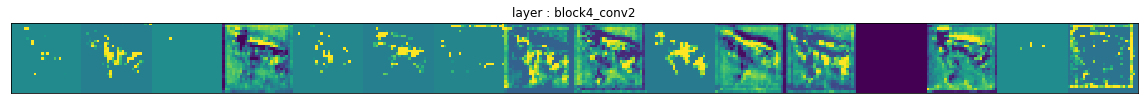

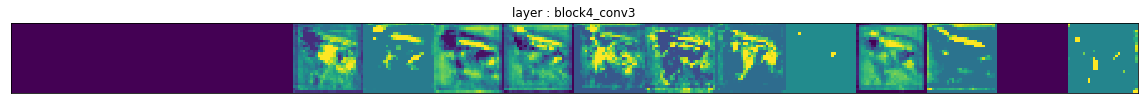

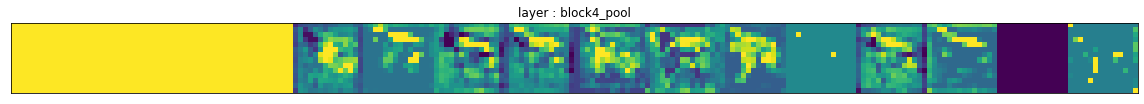

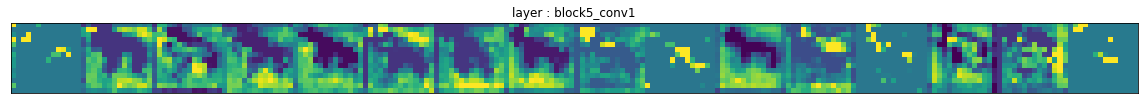

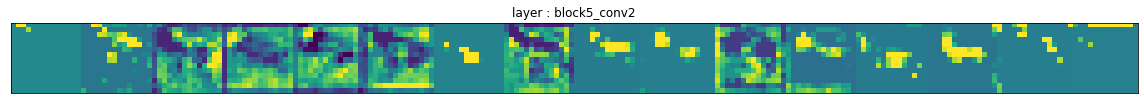

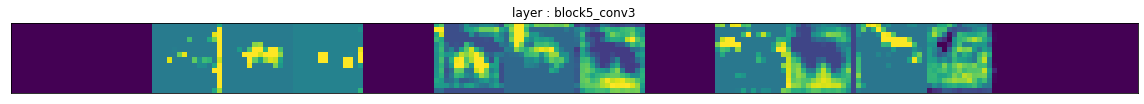

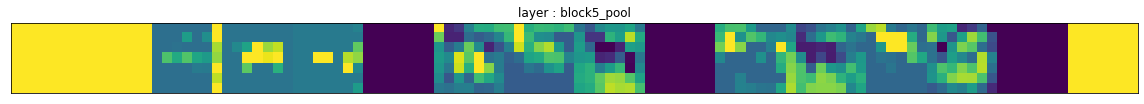

In [0]:
for i in range(len(model_predict_vgg16_dog)):
  show_predict_image(model_predict_vgg16_dog[i],pred_names_vgg16_dog[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


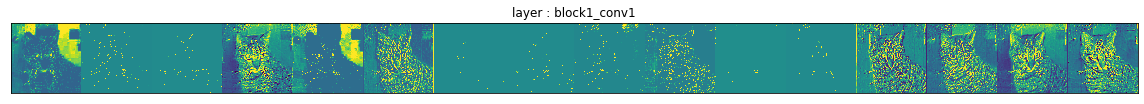

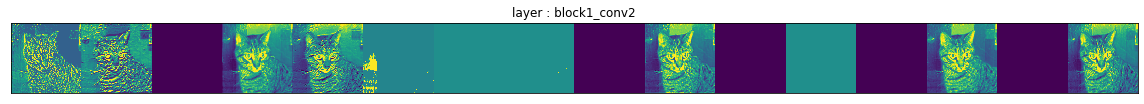

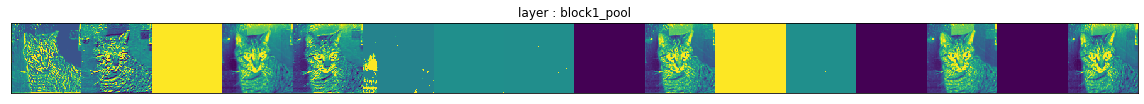

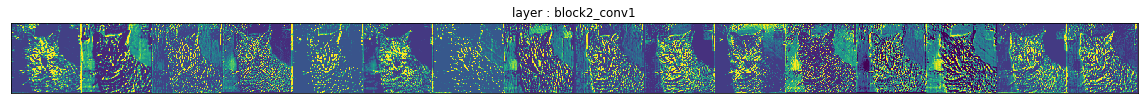

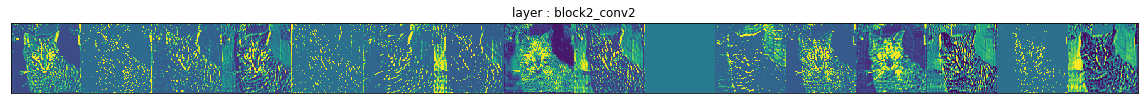

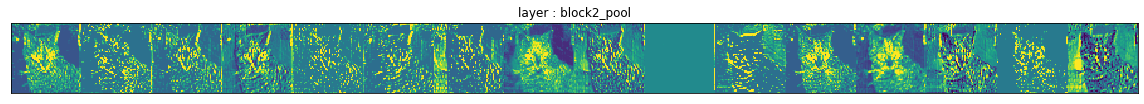

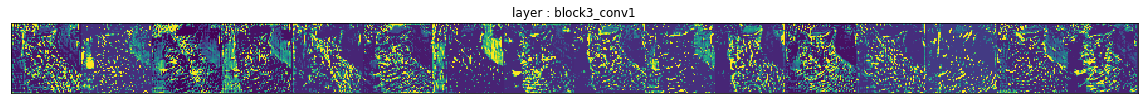

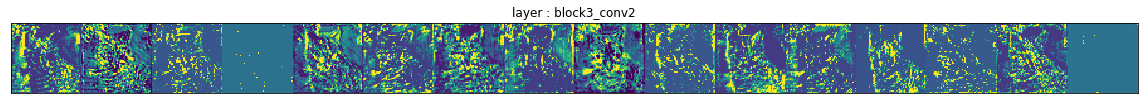

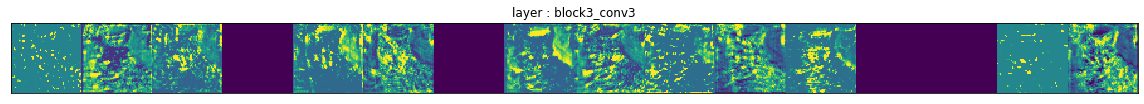

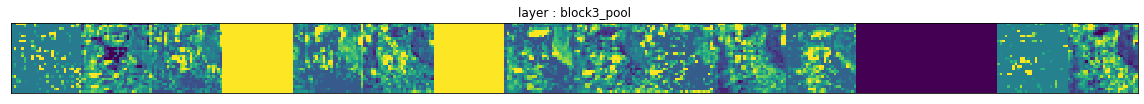

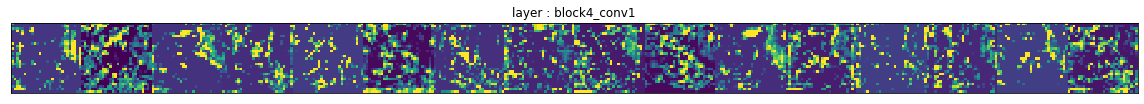

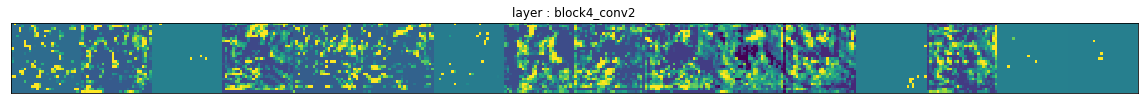

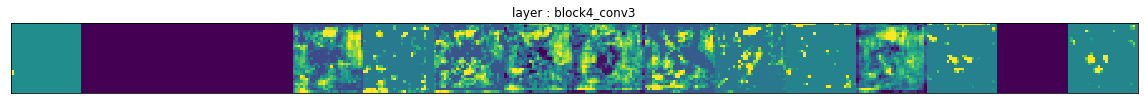

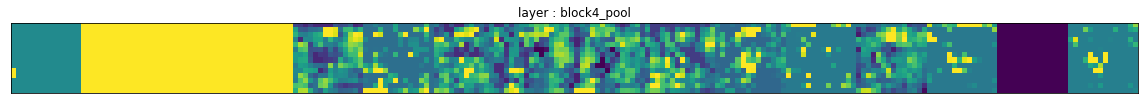

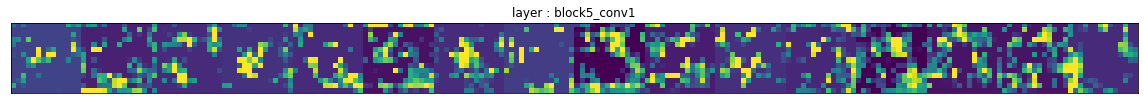

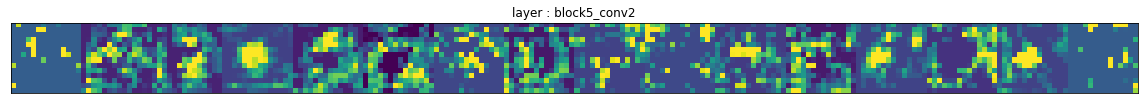

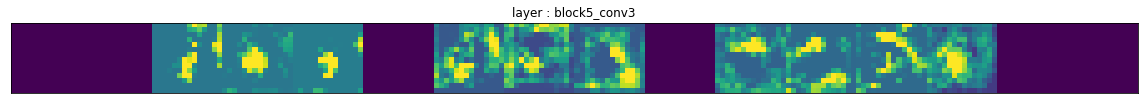

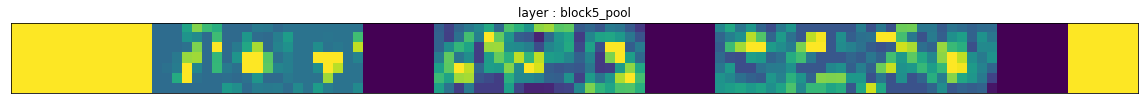

In [0]:
for i in range(len(model_predict_vgg16_cat)):
  show_predict_image(model_predict_vgg16_cat[i],pred_names_vgg16_cat[i])

# Calss Activation Map(CAM)

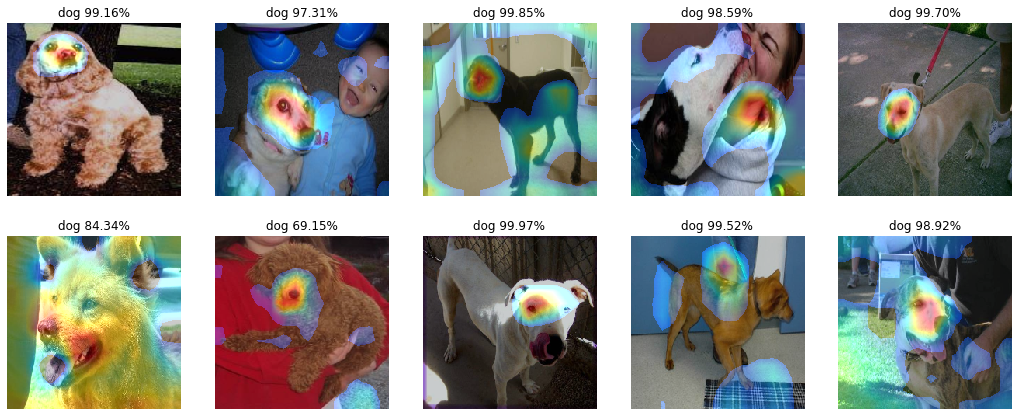

In [0]:
import cv2
plt.figure(figsize=(18, 15))
for i in range(40,50):
  try:
    path = os.path.join('/content/gdrive/My Drive/copy_dogs-vs-cats/test/dog/dog.%d.jpg'%i)
    image = cv2.imread(path)
    img = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH))
  except Exception as e:
    print(str(e))

  x = img.copy()
  x.astype(np.float32)
  x = np.expand_dims(x, axis=0)
  x = x / 255.0
  
  grad_model = tf.keras.models.Model(
        [model_vgg16.inputs], [model_vgg16.get_layer('block5_conv3').output, model_vgg16.output]
    )
    
  with tf.GradientTape() as tape:
      inputs = tf.cast(x, tf.float32)
      model_outputs, predictions = grad_model(inputs)
      loss = predictions[:,0]

  grads = tape.gradient(loss, model_outputs)

  guided_grads = (
        tf.cast(model_outputs > 0, "float32") * tf.cast(grads > 0, "float32") * grads
  )

  prediction = predictions[0]
  model_outputs = model_outputs[0]
  plt.subplot(4, 5, i-40+1)
  if prediction < 0.5:
    plt.title('cat %.2f%%' % (100 - prediction*100))
  else:
    plt.title('dog %.2f%%' % (prediction*100))

  weights = np.mean(grads, axis=(1, 2))
  weights = weights.reshape(512, 1)

  cam = (prediction -0.5) * np.matmul(model_outputs, weights)
  cam -= np.min(cam)
  cam /= np.max(cam)
  cam -= 0.2
  cam /= 0.8

  try:
    cam = cv2.resize(np.float32(cam), (224, 224))
  except Exception as e:
    print(str(e))

  heatmap = cv2.applyColorMap(np.uint8(255*cam), cv2.COLORMAP_JET)
  heatmap[np.where(cam <= 0.2)] = 0
  grad_cam = cv2.addWeighted(img, 0.8, heatmap, 0.4, 0)
  plt.axis('off')
  plt.imshow(grad_cam[:, :, ::-1])



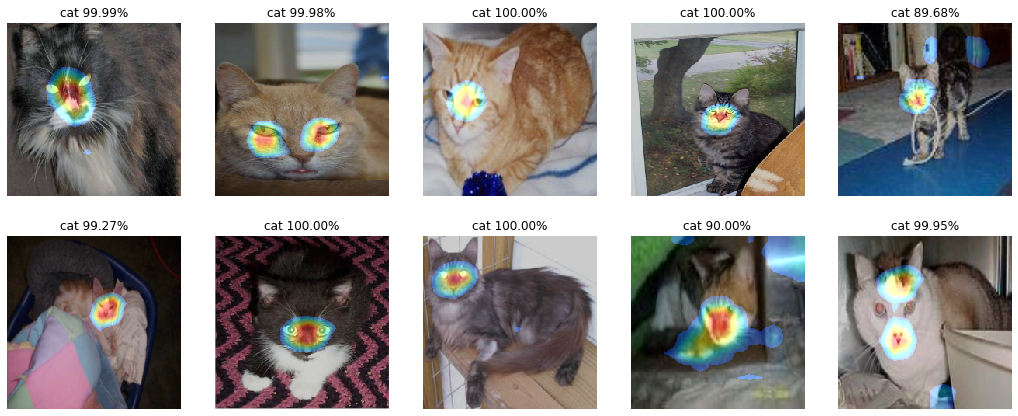

In [0]:
import cv2
plt.figure(figsize=(18, 15))
for i in range(40,50):
  try:
    path = os.path.join('/content/gdrive/My Drive/copy_dogs-vs-cats/test/cat/cat.%d.jpg'%i)
    image = cv2.imread(path)
    img = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH))
  except Exception as e:
    print(str(e))

  x = img.copy()
  x.astype(np.float32)
  x = np.expand_dims(x, axis=0)
  x = x / 255.0
  
  grad_model = tf.keras.models.Model(
        [model_vgg16.inputs], [model_vgg16.get_layer('block5_conv3').output, model_vgg16.output]
    )
    
  with tf.GradientTape() as tape:
      inputs = tf.cast(x, tf.float32)
      model_outputs, predictions = grad_model(inputs)
      loss = predictions[:,0]

  grads = tape.gradient(loss, model_outputs)

  guided_grads = (
        tf.cast(model_outputs > 0, "float32") * tf.cast(grads > 0, "float32") * grads
  )

  prediction = predictions[0]
  model_outputs = model_outputs[0]
  plt.subplot(4, 5, i-40+1)
  if prediction < 0.5:
    plt.title('cat %.2f%%' % (100 - prediction*100))
  else:
    plt.title('dog %.2f%%' % (prediction*100))

  weights = np.mean(grads, axis=(1, 2))
  weights = weights.reshape(512, 1)

  cam = (prediction -0.5) * np.matmul(model_outputs, weights)
  cam -= np.min(cam)
  cam /= np.max(cam)
  cam -= 0.2
  cam /= 0.8

  try:
    cam = cv2.resize(np.float32(cam), (224, 224))
  except Exception as e:
    print(str(e))

  heatmap = cv2.applyColorMap(np.uint8(255*cam), cv2.COLORMAP_JET)
  heatmap[np.where(cam <= 0.2)] = 0
  grad_cam = cv2.addWeighted(img, 0.8, heatmap, 0.4, 0)
  plt.axis('off')
  plt.imshow(grad_cam[:, :, ::-1])

